## Problema I

Se pide agrupar un total de 8 patrones bidimensionales en tres clusters (𝑘 =
3). 

Los patrones son los siguientes: 
A1 (2,10), A2(2,5), A3(8,4), A4(5,8), A5(7,5), A6(6,4), A7(1,2) y A8(4,9). 

Los centroides iniciales son los puntos A1, A3 y A4.

La métrica de distancia utilizada será la distancia euclídea.




**Primero** tenemos que localizar los centros A1, A3 y A4.

C1:(2,10) C2:(1,2) C3:(5,8)

**Segundo** comienzo a calcular la distancia entre cada uno de ls puentos con respecto a cada  para clasificarlos en grupos.

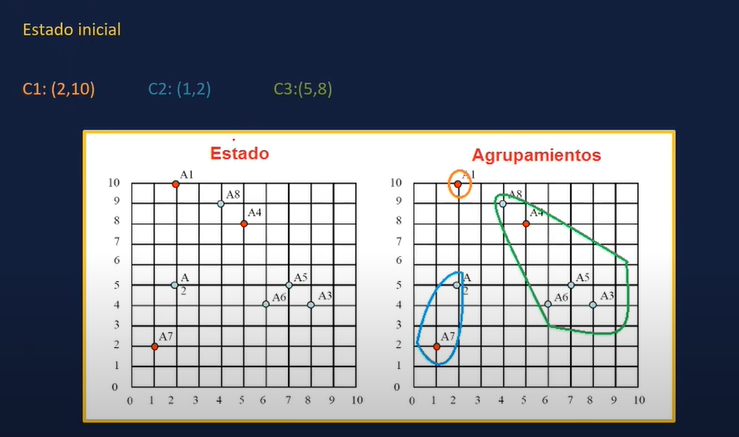

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Image("img/e_inicial.png")

Ahora visualizo los datos como quedarían graficamente

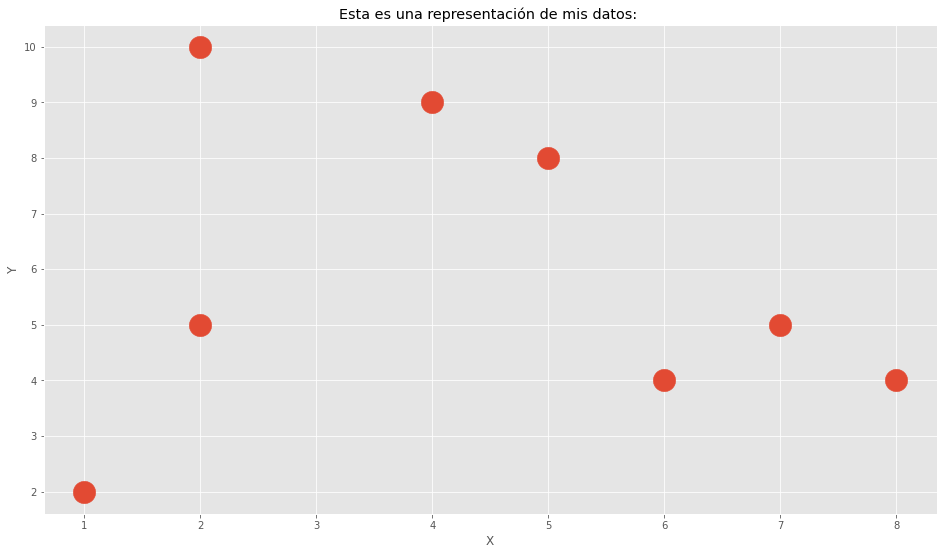

In [2]:
b = np.matrix('2 10; 2 5; 8 4; 5 8; 7 5; 6 4; 1 2; 4 9')
df_k =  pd.DataFrame(b, columns = ['x','y'])


# Using s= to change the marker size
plt.scatter(df_k.x, df_k.y, s = 500)
plt.xlabel('X')
plt.ylabel('Y')

plt.title('Esta es una representación de mis datos: ')
plt.show()


Primero realizo un objeto Kmean para poder utilizar el algoritmo.
Para ello tengo que saber el valor de K

En este caso es 3, sino lo supieramos tenemos que averiguar primero.




In [3]:
# Creamos el objeto
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 ).fit(df_k)

# Ya nos dieron la informacion de los entroides
# Pero si tuviera que averiguarlos es asi:
#centroids = kmeans.cluster_centers_

centroids = [[2,10], [5,8], [1,2]]

print (centroids)

[[2, 10], [5, 8], [1, 2]]


Se pide:

1. Representar los clusters creados y la posición de los centroides después
de cada iteración.

2. El valor de la métrica SSE.

3. Comparar los resultados con los obtenidos en el ejemplo de la sección
2.3. del manual de la lección 5.

4. ¿Á que se debe la diferencia de resultados?


**Ya hemos ejecutado k-means y obtenido los centroides. Ahora podemos asignar cada registro de nuestro dataset a uno de los clústers:**



Añadimos la columna “label” a nuestro dataframe original para almacenar la clase en donde está

In [4]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_k)
df_k['labels'] = labels

**Representación gráfica de los clústeres k-means**

Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variables.

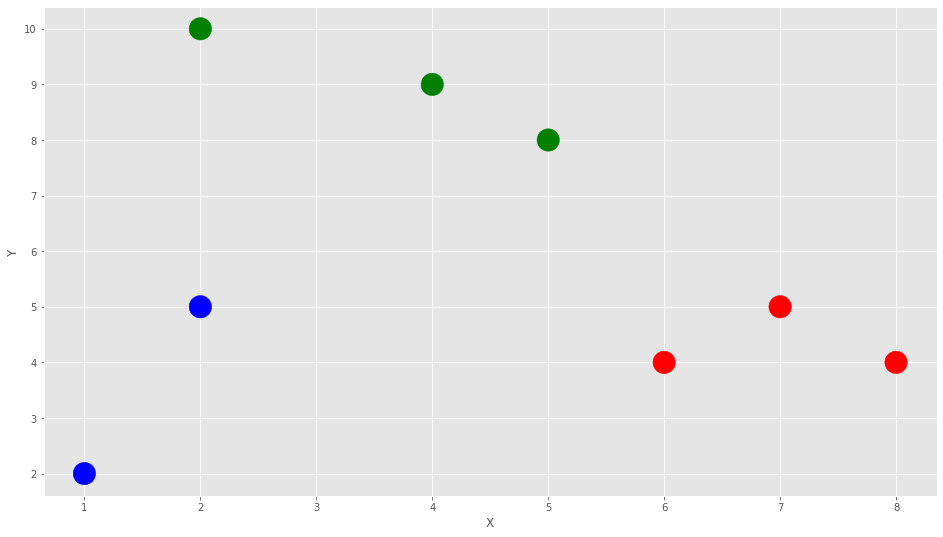

In [5]:

#%% Plot k-means clustering.
colores=['red','green','blue']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(df_k.x, df_k.y, c=asignar, s=500)
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20)
#plt.scatter(centroids_x,centroids_y,marker = "X", s=150,linewidths = 5, zorder = 10, c=['green', 'red','blue'])

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Etiquetamos nuestro dataframe.
labels = kmeans.predict(df)
df_k['label'] = labels

## Problema II

Dada la siguiente matriz de distancias entre cinco patrones:

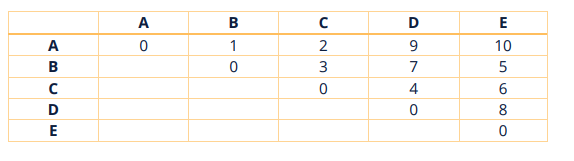

In [6]:
from IPython.display import Image
Image("img/8.png")

Se pide:
    
1. Aplicar un clustering jerárquico con el método de enlace simple.

2. Aplicar un clustering jerárquico con el método de enlace completo.

3. ¿Se podría usar el método de enlace medio con estos datos? Justifica la
respuesta.


## Problema III

Dados los mismos puntos del Problema I.


Se pide:
    
1. Aplicar DBSCAN considerando 𝑀 = 3 y ϵ = √2.

2. Aplicar DBSCAN considerando 𝑀 = 3 y ϵ = √10.

3. ¿En qué afecta el cambio del parámetro ϵ ?